### Download, normalize and split vol cube data into train/test datasets

In [1]:
import sys
sys.path.append('../..')  # to go to the main folder of the whole project

from src.data.vol.get_vol_cube_tenors_strikes_dates import get_vol_cube_tenors_strikes_dates
data, opt_tenors, swap_tenors, strikes, dates = get_vol_cube_tenors_strikes_dates()

# Normalize data
from src.data.vol.normalizer import Normalizer
normalizer = Normalizer()
data_norm = normalizer.normalize(data)

# Split train and test datasets
from src.utils.get_train_test_datasets import get_train_test_datasets
data_norm_train, dates_train, data_norm_test, dates_test = get_train_test_datasets(data_norm,
                                                                                   dates,
                                                                                    seed=0,
                                                                                    train_ratio=0.8,
                                                                                    type='random_split')
data_train = normalizer.denormalize(data_norm_train)
data_test = normalizer.denormalize(data_norm_test)

### Load the saved model and its history from the file

In [3]:
from src.utils.load_model_and_history import load_model_and_history

NAME = 'vae_van_2latd_400_200_200_100_3000ep_bat16_1'
vae, history = load_model_and_history(NAME,
                                      data_type='vol')

c:\Users\alexi\Documents\All\ETH_UZH\MasterThesis\_MT_Vol_cube\code_my\autoencoder_library\venv\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Error histogram for test dataset

Error histogram shows the distribution of errors. Each error is the difference between real volatility value and reconstructed volatility value from VAE for a certain data point (with a certain strike, swap tenor and option tenor) in volatility cube and a certain date. Mean (and max) is calculated over all dates and data points in vol cube.

Mean error 11.98
Max error 180.2


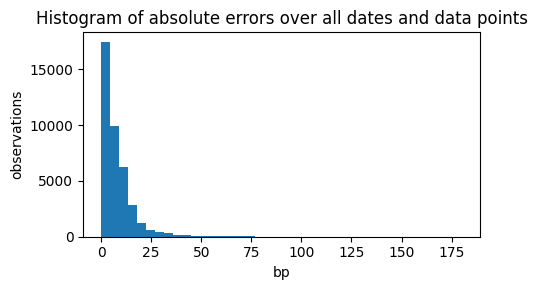

In [4]:
from src.visualization.vol.error_histograms import error_histograms

predictions = normalizer.denormalize(vae.predict(x=data_norm_test, verbose=0))
error_histograms(predictions,
                 data_test)

Error is huge due to huge beta: VAE tried to minimize KL loss neglecting reconstruction loss.

### Plot 2d latent space values

The latent space variables (z0, z1, z2) for train dataset look similar to the Gaussian distribution - that's why Kullback-Leibner loss is small

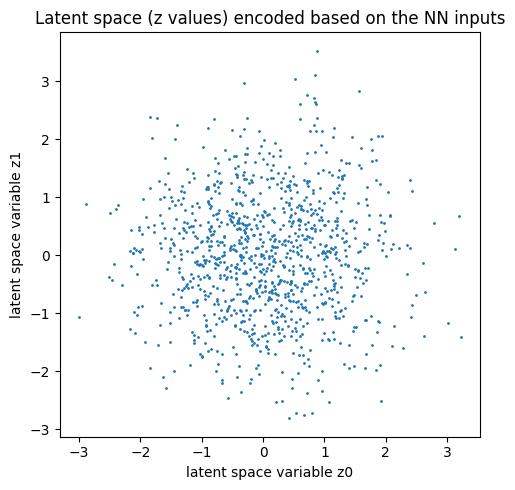

In [5]:
from src.visualization.plot_latent_space_2d_values import plot_latent_space_2d_values
plot_latent_space_2d_values(vae,
                            data_norm_train,
                            indexes=[0,1],
                            vae_latent_type='z')